In [714]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [736]:
df = pd.read_csv('crypto_data.csv')

In [737]:
df = pd.DataFrame(df)

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [741]:
pip install sweetviz

  Using cached sweetviz-2.1.3-py3-none-any.whl (15.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [747]:
df.dropna()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [749]:
import sweetviz as sv

#You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.

my_report = sv.analyze(df)

my_report.show_html()

##Subset by using the compare_intra. We input the condition in the parameter and the name as well.

# my_report = sv.compare_intra(df, df["column"] == "variable", ["variable1", "variable2"], target_feat ='column')

# my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetvi

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [745]:
# I only want circulating coins so I look for and drop any False rows for the column IsTrading

In [750]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [751]:
df = df[df['IsTrading'] == True]

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [753]:
# Removing rows with at least 1 null value

In [754]:
df.dropna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [755]:
# Removed any rows where Total Coins Mined was less than 0

In [756]:
df = df[df["TotalCoinsMined"] > 0]

In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 29.6+ KB


In [758]:
# Dropping CoinName column because the names don't really contribute to the model's analysis

In [759]:
df_coin_names = df['CoinName']

In [760]:
df = df.drop('CoinName', axis=1)

In [761]:
df = df.drop('IsTrading', axis=1)

In [762]:
df = df.drop('Unnamed: 0', axis=1)

In [763]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [764]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [765]:
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [766]:
# Changing categorical data into numerical (enconding) with get dummies function

In [767]:
df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [769]:
# checking shapes

In [770]:
df.shape

(532, 98)

In [771]:
# before i reduce dimensionality, i will scale the data set 

In [772]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [773]:
df.shape

(532, 98)

In [774]:
df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [775]:
df_scaled = df

In [776]:
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [777]:
#df = df_scaled

In [778]:
# using PCA for Dimensionality Reduction

In [779]:
# Importing Libraries 

In [780]:
df_shape = pd.DataFrame(df)

In [781]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [782]:
# Initialize PCA model and set n_components to .9 to save at least 90% of the dataset
pca = PCA(n_components=4)

In [783]:
# Get two principal components for the data.
df_pca = pca.fit_transform(df_scaled)

In [784]:
# Transform PCA data to a DataFrame
df2 = pd.DataFrame(data=df_pca)

In [785]:
df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [786]:
# Transform PCA data to a DataFrame
df2

,0,1,2,3
0,-0.334347,1.079687,-0.517586,0.005445
1,-0.317678,1.079921,-0.518111,0.005481
2,2.301254,1.583618,-0.640948,0.018710
3,-0.143875,-1.364152,0.153641,-0.000454
4,-0.148781,-2.059332,0.416882,-0.009088
...,...,...,...,...
527,2.469840,0.738723,-0.187100,0.048763
528,-0.332392,1.079571,-0.517614,0.005443
529,0.320420,-2.405727,0.433786,-0.017743
530,-0.153442,-2.008576,0.391803,-0.001421


In [787]:
# df.head()

In [788]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279315 , 0.02137919, 0.02049977, 0.02044472])

In [789]:
# the PCA model reduced the dimension 910 to 240 saving 90% of the dataset in the process

In [790]:
df2.shape

(532, 4)

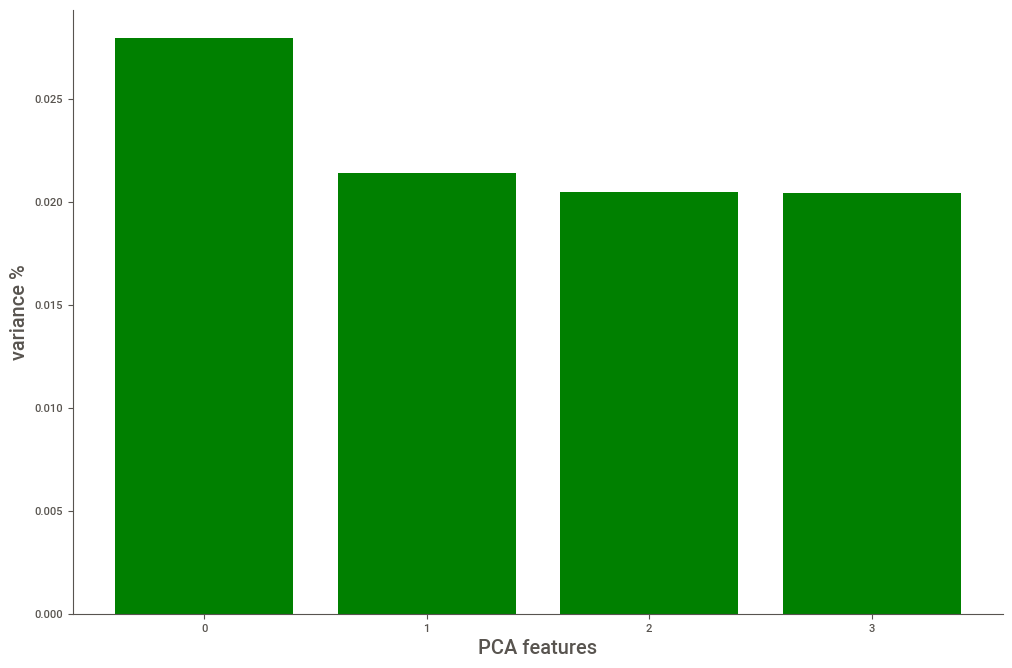

In [791]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

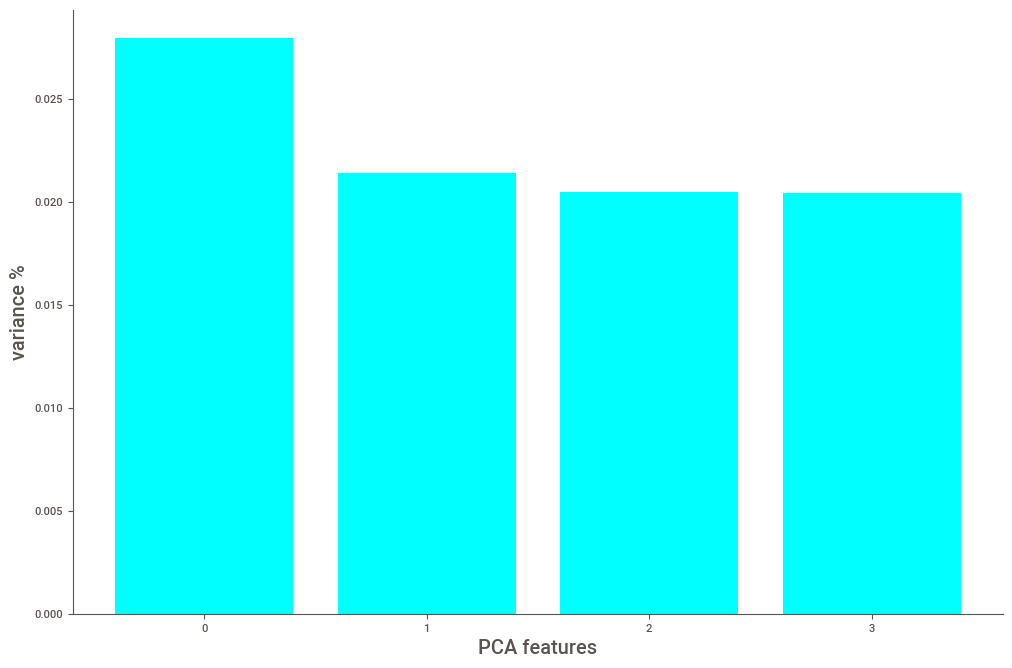

In [792]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='aqua')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [793]:
# Further reducing with t-SNE (down to 2d plot - 2 dimensions)

In [794]:
from sklearn.manifold import TSNE

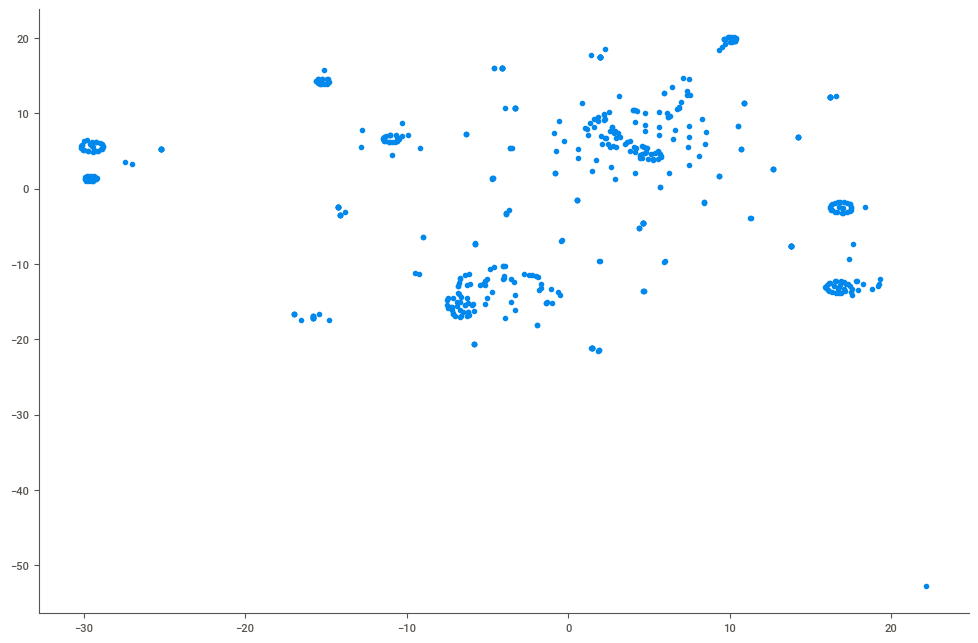

In [796]:
# Run t-SNE
tsne = TSNE(learning_rate=25,perplexity=30)
tsne_features = tsne.fit_transform(df)

# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [260]:
#df_coin_names.value_counts()

In [797]:
df = pd.DataFrame(tsne_features)

In [798]:
# Use Kmeans to analyze clusters

In [799]:
from sklearn.cluster import KMeans

In [800]:
df.shape

(532, 2)

In [801]:
crypto_pca = pd.DataFrame(df2)
crypto_pca.head()

,0,1,2,3
0,-0.334347,1.079687,-0.517586,0.005445
1,-0.317678,1.079921,-0.518111,0.005481
2,2.301254,1.583618,-0.640948,0.018710
3,-0.143875,-1.364152,0.153641,-0.000454
4,-0.148781,-2.059332,0.416882,-0.009088


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       532 non-null    float32
 1   1       532 non-null    float32
dtypes: float32(2)
memory usage: 4.3 KB


In [803]:
df = df.select_dtypes(include='object').columns.tolist()

In [804]:
df

[]

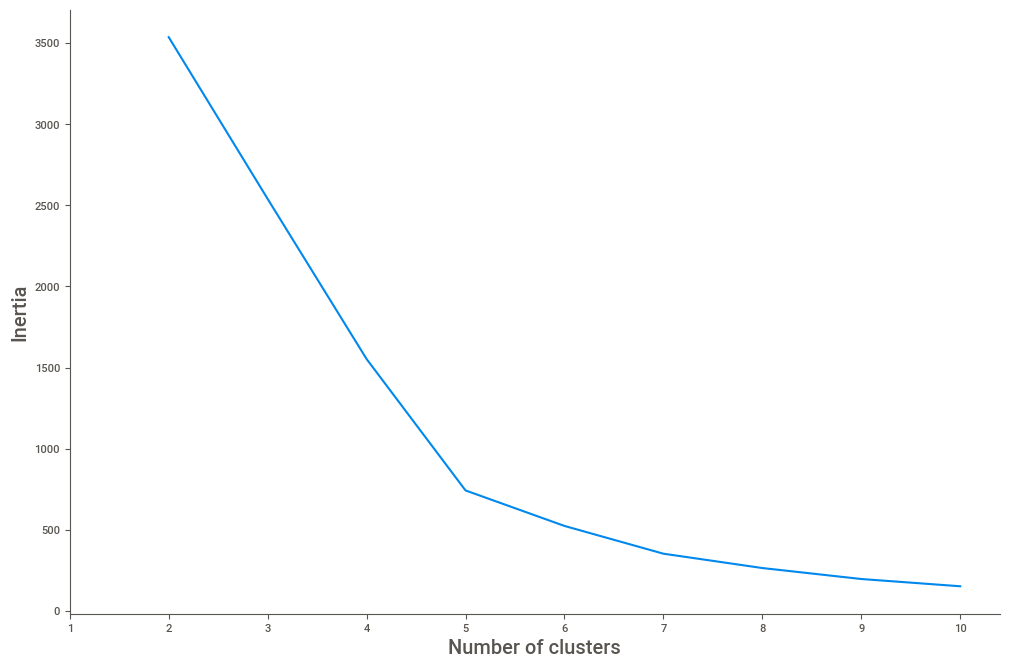

In [805]:
# Finding the best value for k
inertia = []
k = list(range(2, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df2)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

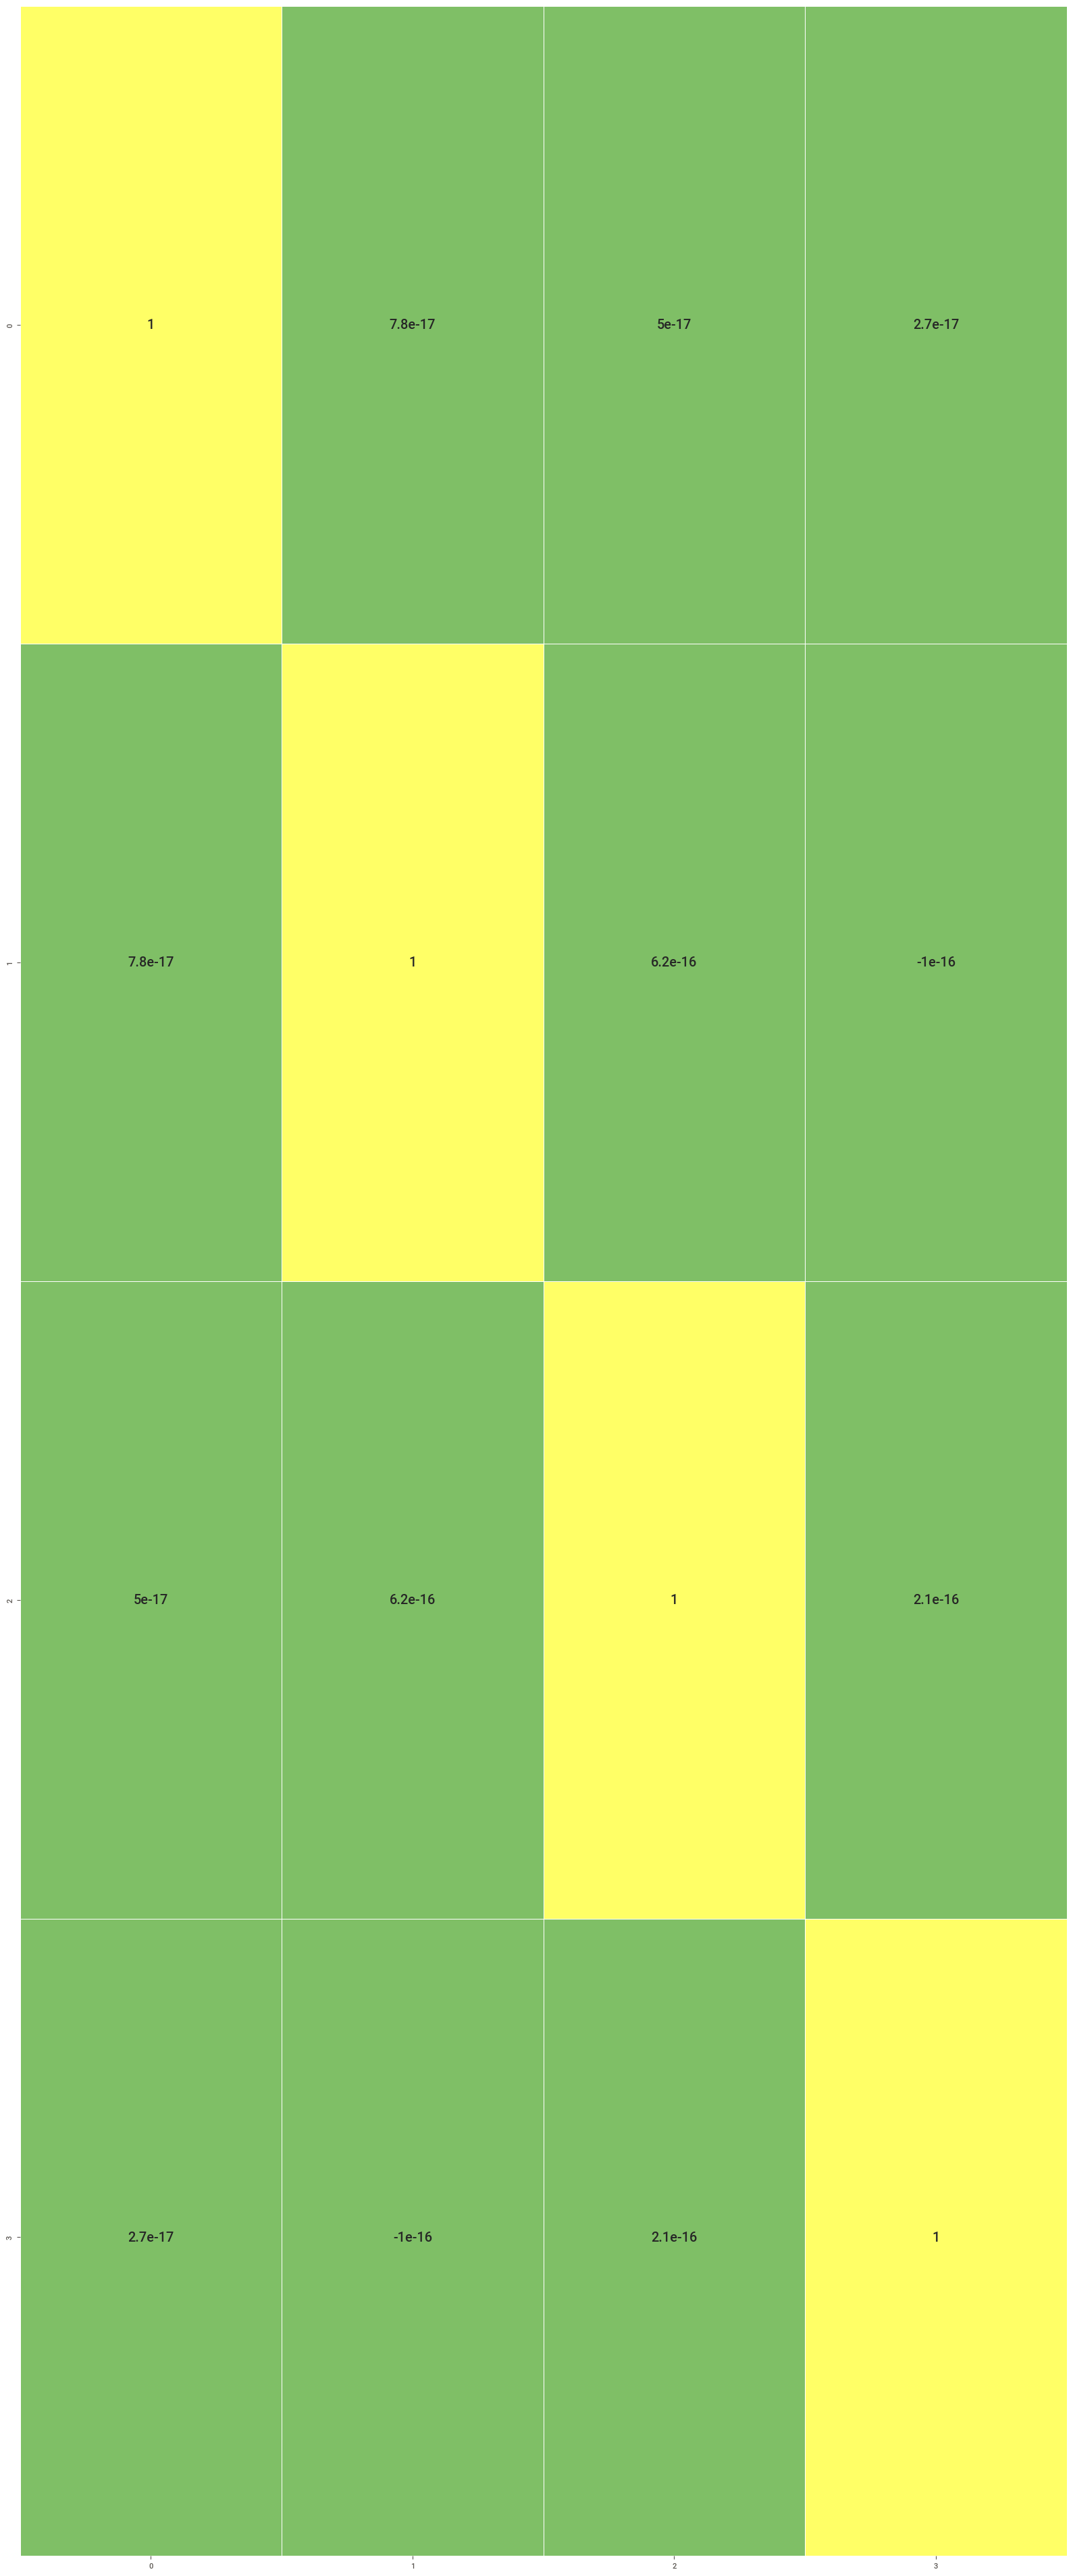

In [806]:
import seaborn as sns
# Heat map to identify highly correlated variables
plt.figure(figsize=(20,50))
sns.heatmap(df2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="summer")
plt.show()

In [807]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,-6.673786,-16.979353
1,-2.400818,-11.468277
2,-14.787830,-17.444750
3,-30.148325,5.424385
4,16.220232,12.214208
...,...,...
527,-27.450275,3.502777
528,-6.113212,-11.327582
529,9.670633,19.846270
530,1.982597,17.505049


In [808]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [809]:
get_clusters(4, k_means_df)

,0,1,class
0,-6.673786,-16.979353,2
1,-2.400818,-11.468277,2
2,-14.787830,-17.444750,2
3,-30.148325,5.424385,0
4,16.220232,12.214208,1
...,...,...,...
527,-27.450275,3.502777,0
528,-6.113212,-11.327582,2
529,9.670633,19.846270,1
530,1.982597,17.505049,1


In [810]:
k_means_df['class'].nunique()

4

In [670]:
# K means subdivided crypto currencies into 4 different classes based on clusters

In [811]:
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.show()

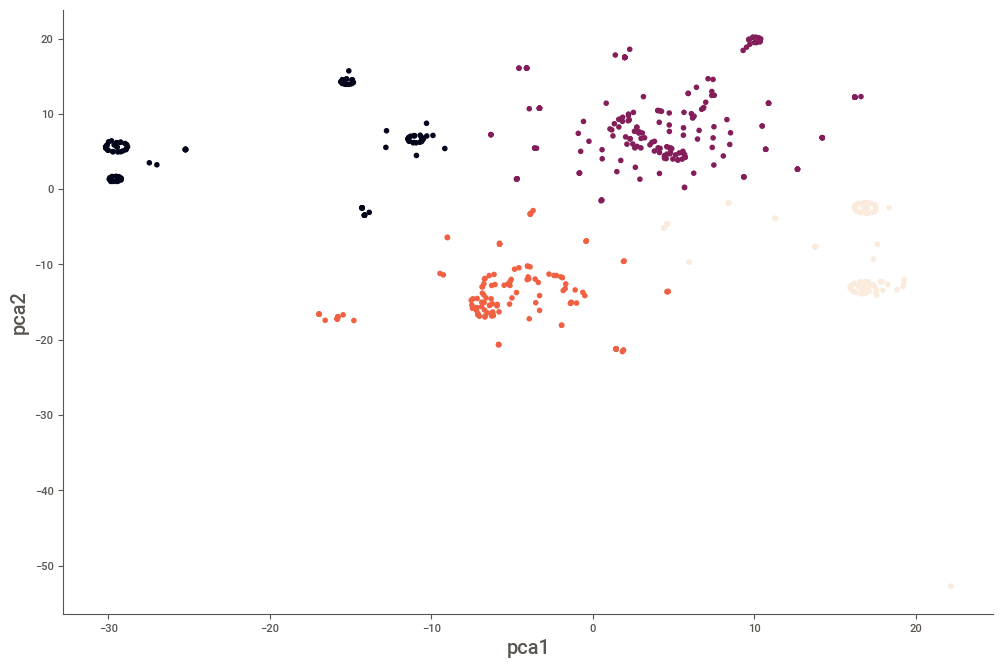

In [812]:
show_clusters(k_means_df)

In [813]:
df_coin_names

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [814]:
k_means_df

,0,1,class
0,-6.673786,-16.979353,2
1,-2.400818,-11.468277,2
2,-14.787830,-17.444750,2
3,-30.148325,5.424385,0
4,16.220232,12.214208,1
...,...,...,...
527,-27.450275,3.502777,0
528,-6.113212,-11.327582,2
529,9.670633,19.846270,1
530,1.982597,17.505049,1


In [819]:
df_coins = df_coin_names.reset_index()

In [821]:
df_coins.drop('index', axis=1)

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [833]:
final_df = pd.concat([df_coins, k_means_df],axis=1, sort=False)
df = final_df 
df = df.drop('index', axis=1)

In [834]:
coinclass1 = df[df['class'] == 1]
coinclass2 = df[df['class'] == 2]
coinclass3 = df[df['class'] == 3]
coinclass4 = df[df['class'] == 4]

In [835]:
coinclass1

,CoinName,0,1,class
4,Ethereum,16.220232,12.214208,1
5,Litecoin,2.848560,7.452652,1
7,Monero,14.205613,6.836220,1
8,Ethereum Classic,16.220324,12.214227,1
9,ZCash,1.982597,17.505049,1
...,...,...,...,...
521,Oxycoin,-3.299254,10.748718,1
523,Waves,-0.749200,5.021681,1
525,BitTorrent,7.446976,14.576147,1
529,Beldex,9.670633,19.846270,1


In [837]:
import sweetviz as sv

#You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.

my_report = sv.analyze(df)

my_report.show_html()

##Subset by using the compare_intra. We input the condition in the parameter and the name as well.

# my_report = sv.compare_intra(df, df["column"] == "variable", ["variable1", "variable2"], target_feat ='column')

# my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/Users/ccbernal/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [838]:
coinclass1.to_csv('CryptoClass1')
coinclass2.to_csv('CryptoClass2')
coinclass3.to_csv('CryptoClass3')
coinclass4.to_csv('CryptoClass4')